In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7532 - mae: 0.8278 - val_loss: 0.4599 - val_mae: 0.4900
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4044 - mae: 0.4500 - val_loss: 0.4057 - val_mae: 0.4522
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3714 - mae: 0.4332 - val_loss: 0.3917 - val_mae: 0.4402
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3622 - mae: 0.4246 - val_loss: 0.3813 - val_mae: 0.4383
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3391 - mae: 0.4091 - val_loss: 0.3652 - val_mae: 0.4237
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3258 - mae: 0.3963 - val_loss: 0.3755 - val_mae: 0.4493
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3191 - mae: 0.3977 - val_loss: 0.3544 - val_mae: 0.4276
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3046 - mae: 0.3869 - val_loss: 0.3361 - val_mae: 0.4105
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

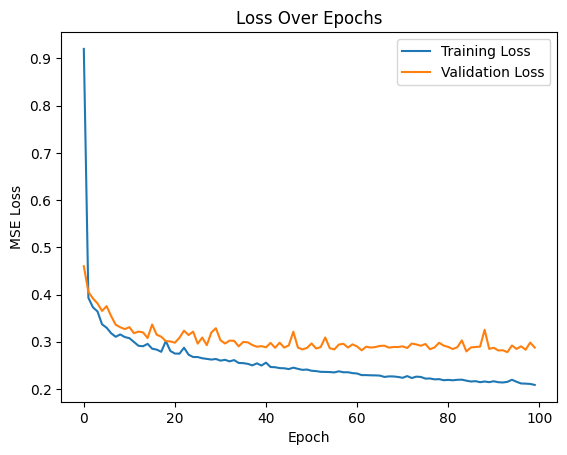

In [6]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [7]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2607 - mae: 0.3508
Test MAE: 0.35


In [14]:
# Predict on test set
y_pred = model.predict(X_test)

# Show first 5 predictions with actual values
print("First 5 predictions vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i]:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
First 5 predictions vs actual values:
Predicted: 0.41, Actual: 0.48
Predicted: 0.93, Actual: 0.46
Predicted: 4.85, Actual: 5.00
Predicted: 2.50, Actual: 2.19
Predicted: 2.37, Actual: 2.78


In [21]:
# Take a sample input from test
sample_index = 19
sample_input = X_test[sample_index].reshape(1, -1)

# Make prediction
predicted_price = model.predict(sample_input)[0][0]
actual_price = y_test[sample_index]

# Show prediction
print(f"\nCustom Prediction:")
print(f"Predicted Price: {predicted_price:.2f}")
print(f"Actual Price   : {actual_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Custom Prediction:
Predicted Price: 1.10
Actual Price   : 1.38
